# Surface Codes
Surface codes are a particular family of topological codes which aim to approach scalable fault-tolerant quantum computation. This codes are based around a 2-D planar qubit layout with only nearest neighbor interactions. In this exercise, we will focus on the **Surface-17 code**, that is represented by the following diagram:

<div style="text-align: center;">
    <img src="./media/surface-17_diagram.png" width="300px"/>
</div>

Where the white circles represent **data** qubits, black circles represent **syndrome** qubits, dark squares and triangle patches represent **X** stabilizers, and light patches represent **Z** stabilizers.

## Stabilizers Formalism
This explanation for the use of stabilizers in Quantum Error Correction was taken from Qiskit Summer School 2025 [https://www.ibm.com/quantum/blog/qiskit-summer-school-2025]:

The stabilizer formalism is a powerful framework for constructing and understanding many QEC codes.

-   The **Pauli group** $P_n$ on $n$ qubits consists of all $n$-fold tensor products of Pauli matrices $\{I, X, Y, Z\}$, multiplied by overall factors $\{\pm 1, \pm i\}$.
-   A **stabilizer code** is defined by its **stabilizer group S**, which is an abelian subgroup of $P_n$ such that $-I \notin S$.
-   The **codespace C(S)** is the subspace of $(\mathbb{C}^2)^{\otimes n}$ simultaneously stabilized by all elements of $S$. That is, for any state $|\psi\rangle \in C(S)$ and any $g \in S$, $g|\psi\rangle = |\psi\rangle$. So, states in the codespace are +1 eigenstates of all stabilizer operators.
-   Typically, $S$ is specified by a set of $m = n-k$ independent and commuting generators $S = \langle g_1, g_2, ..., g_m \rangle$.

  Many powerful Quantum Error Correcting Codes (QECCs), including the 3-qubit repetition code discussed below, as well as the famous Steane (`[[7, 1, 3]]`) and Shor (`[[9, 1, 3]]`) codes, belong to the family of **stabilizer codes**. The stabilizer formalism provides a powerful framework for defining quantum codes and designing error detection and correction procedures.

**1. Stabilizing States and Subspaces:**

* An operator $S$ is said to **stabilize** a quantum state $|\psi\rangle$ if $|\psi\rangle$ is an eigenstate of $S$ with eigenvalue +1. That is, $S|\psi\rangle = |\psi\rangle$.
* An operator $S$ stabilizes a subspace (the **codespace**, denoted $\mathcal{C}$) if it stabilizes *every* state $|\psi\rangle$ within that subspace: $S|\psi\rangle = |\psi\rangle$ for all $|\psi\rangle \in \mathcal{C}$.

**2. The Stabilizer Group ($\mathcal{S}$):**

* For a given stabilizer code, the set of all operators that stabilize the codespace $\mathcal{C}$ forms a mathematical group called the **stabilizer group**, denoted $\mathcal{S}$.
* **Key Properties:**
    * All operators $S_i, S_j$ in the group $\mathcal{S}$ must **commute** with each other: $S_i S_j = S_j S_i$.
    * Stabilizer operators are typically constructed from tensor products of **Pauli operators** ($I, X, Y, Z$) acting on $n$ qubits. For example, $X \otimes Z \otimes I \otimes X$ could be a stabilizer element for $n=4$.
    * The identity operator $I^{\otimes n}$ is always an element of $\mathcal{S}$. By convention, $-I^{\otimes n}$ is usually excluded.

**3. Generators ($\{g_i\}$):**

* Instead of listing all elements of the potentially large group $\mathcal{S}$, we define it using a smaller set of **generators**, $g_1, g_2, ..., g_{n-k}$.
* Any element $S \in \mathcal{S}$ can be created by taking products of these generators (e.g., $g_1 g_3$, $g_2 g_5 g_1$, etc.).
* **Key Properties of Generators:**
    * They must **commute** with each other: $[g_i, g_j] = 0$ for all $i, j$.
    * They must be **independent**: no generator can be formed by multiplying the others in the set.
    * There are $n-k$ independent generators for an `[[n, k, d]]` code.

**4. Defining the Codespace ($\mathcal{C}$):**

* The codespace $\mathcal{C}$ of a stabilizer code is the **simultaneous +1 eigenspace** of all its generators (and thus all elements in $\mathcal{S}$).
* If a state $|\psi\rangle$ is in the codespace, it must satisfy $g_i |\psi\rangle = |\psi\rangle$ for all generators $i=1, ..., n-k$.
* Starting with the full $2^n$-dimensional Hilbert space of $n$ physical qubits, each independent generator effectively halves the dimension of the subspace it stabilizes. Therefore, $n-k$ independent generators define a $2^{n-(n-k)} = 2^k$-dimensional codespace, which is exactly the space needed to encode $k$ logical qubits.

**5. Error Detection using Stabilizers:**

* The primary function of stabilizers in QEC is **error detection**. This works by measuring the eigenvalues of the stabilizer generators.
* **No Error:** If the system is in a valid codespace state $|\psi\rangle \in \mathcal{C}$ and no error occurs, measuring any generator $g_i$ will yield the outcome +1 with certainty (because $g_i|\psi\rangle=|\psi\rangle$).
* **Error Occurs:** Suppose an error $E$ (a Pauli operator product) occurs, transforming the state to $E|\psi\rangle$. Now, measure a generator $g_i$.
    * If $g_i$ **commutes** with the error $E$ (i.e., $g_i E = E g_i$):
        - $g_i (E |\psi\rangle) = E g_i |\psi\rangle = E |\psi\rangle$. The measurement outcome is still +1. The error $E$ is *not detected* by $g_i$.
    * If $g_i$ **anti-commutes** with the error $E$ (i.e., $g_i E = -E g_i$):
        - $g_i (E |\psi\rangle) = -E g_i |\psi\rangle = -E |\psi\rangle$. The measurement outcome is -1. The error $E$ *is detected* by $g_i$.
* **Error Syndrome:** The set of measurement outcomes (+1 or -1, often mapped to 0 or 1, respectively) for all the generators $\{g_1, ..., g_{n-k}\}$ constitutes the **error syndrome**.
    * A syndrome of all +1s (or all 0s) indicates either no error occurred, or an error occurred that commutes with all stabilizers (which might be a logical operator or an undetectable error related to the code's distance $d$).
    * A non-trivial syndrome (containing at least one -1 or 1) indicates that a detectable error has occurred. The specific pattern of the syndrome provides information about the likely error $E$ that occurred, which can then be used for correction.


First, we need to get a look at the list of stabilizers:
| X Stabilizers | Z Stabilizers |
|---|---|
| $X_0 X_1 X_3 X_4$ | $Z_0 Z_3$ |
| $X_1 X_2$ | $Z_1 Z_2 Z_4 Z_5$ |
| $X_4 X_5 X_7 X_8$ | $Z_3 Z_4 Z_6 Z_7$ |
| $X_6 X_7$ | $Z_5 Z_8$ |

It is also a good reminder that **X** gates represent a bit flip error, while the **Z** gates represent a phase error, Lastly, the **Y** gates represent a combination of the previous two.

Now, we will explore the way we measure stabilizer. We will show a diagram given by the authors of this paper [https://arxiv.org/pdf/1404.3747]:

<div style="text-align: center;">
    <img src="./media/measuring_stabilizers.png" width="600px"/>
</div>

We can see in the figure that this is the generalization of the measurement of the stabilizers either for X or Z errors. Now, for the ones that have mixed measurements (like the ones that have triangle shapes on top of the squares) we can still measure stabilizers, for example here is the circuit for measuring $X_0 X_1 X_3 X_4$ and $Z_0 Z_3$. 

<div style="text-align: center;">
    <img src="./media/mixed_measurements.png" width="600px"/>
</div>


### Coding and the Qiskit library
For the purposes of this exercise we are going to use the Qiskit library from IBM Quantum, so we will need to import all the necessary libraries.

If the viewer wants to run the code they will need to download qiskit library and the jupyter enviroment, following this set of instructions [https://quantum.cloud.ibm.com/docs/en/guides/install-qiskit].

In [20]:
# Import common packages first
import numpy as np

# Import qiskit classes
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

# Import AerSimulator for the simulation of the QC
from qiskit_aer import AerSimulator

In [21]:
def init_surface_code():    
    data = QuantumRegister(9,"data") # Data qubits
    anc = QuantumRegister(8,"ancilla") # Ancilla qubits
    # idx = {0,1,2,3} -> Z Stabilizers
    # idx = {4,5,6,7} -> X Stabilizers
    cr = ClassicalRegister(8,"s") # Syndrome bits it is of the shape (4 Z-type, 4 X-type), this is important for the decoding.
    qc = QuantumCircuit(data,anc,cr) # Assembling the circuit

    return qc, data, anc, cr

In [33]:
# Now, we will define the qubits relationships for the stabilizers
z_stabilizers = [[0,3], [1,2,4,5], [3,4,6,7], [5,8]]
x_stabilizers = [[0,1,3,4],[1,2],[4,5,7,8],[6,7]]

def measure_z_stabilizer(qc,anc_idx,data_idx_list,cr_idx,data,anc,cr):
    """
    qc = Quantum Circuit
    data_idx_list : List of the indexes of the data qubits that will take part in the measurement
    anc_idx : The index of the ancilla qubit that is going to be measured
    cr_idx : classical bit to store the result
    """
    # As it can be seen by the figures, the ancilla qubit must start at |0>
    qc.reset(anc[anc_idx])
    for index in data_idx_list:
        # each data qubit is the control qubit in the cx operation for Z stabilizers
        qc.cx(data[index],anc[anc_idx])

    qc.measure(anc[anc_idx], cr[cr_idx])

def measure_x_stabilizer(qc,anc_idx,data_idx_list,cr_idx,data,anc,cr):
    """
    qc = Quantum Circuit
    data_idx_list : List of the indexes of the data qubits that will take part in the measurement
    anc_idx : The index of the ancilla qubit that is going to be measured
    cr_idx : classical bit to store the result
    """
    # As it can be seen by the figures, the ancilla qubit must start at |0>
    qc.reset(anc[anc_idx])

    # Then again, as shown in the figure the ancilla qubit must be in |+> state
    qc.h(anc[anc_idx])
    for index in data_idx_list:
        # each data qubit is the target qubit in the cx operation for X stabilizers
        qc.cx(anc[anc_idx],data[index])
    qc.h(anc[anc_idx])
    qc.measure(anc[anc_idx], cr[cr_idx])


In [34]:
def measure_all_stabilizers(qc,data,anc,cr,z_stabilizers, x_stabilizers):
    
    # Measure Z stabilizer:
    for i,stabs in enumerate(z_stabilizers):
        measure_z_stabilizer(qc,i,stabs,i,data,anc,cr)

    # Measure X Stabilizers
    # Due to them sharing registers, the x stabilizers will have a difference
    diff = len(z_stabilizers)
    for i,stabs in enumerate(x_stabilizers):
        measure_x_stabilizer(qc,i+diff,stabs,i+diff,data,anc,cr)

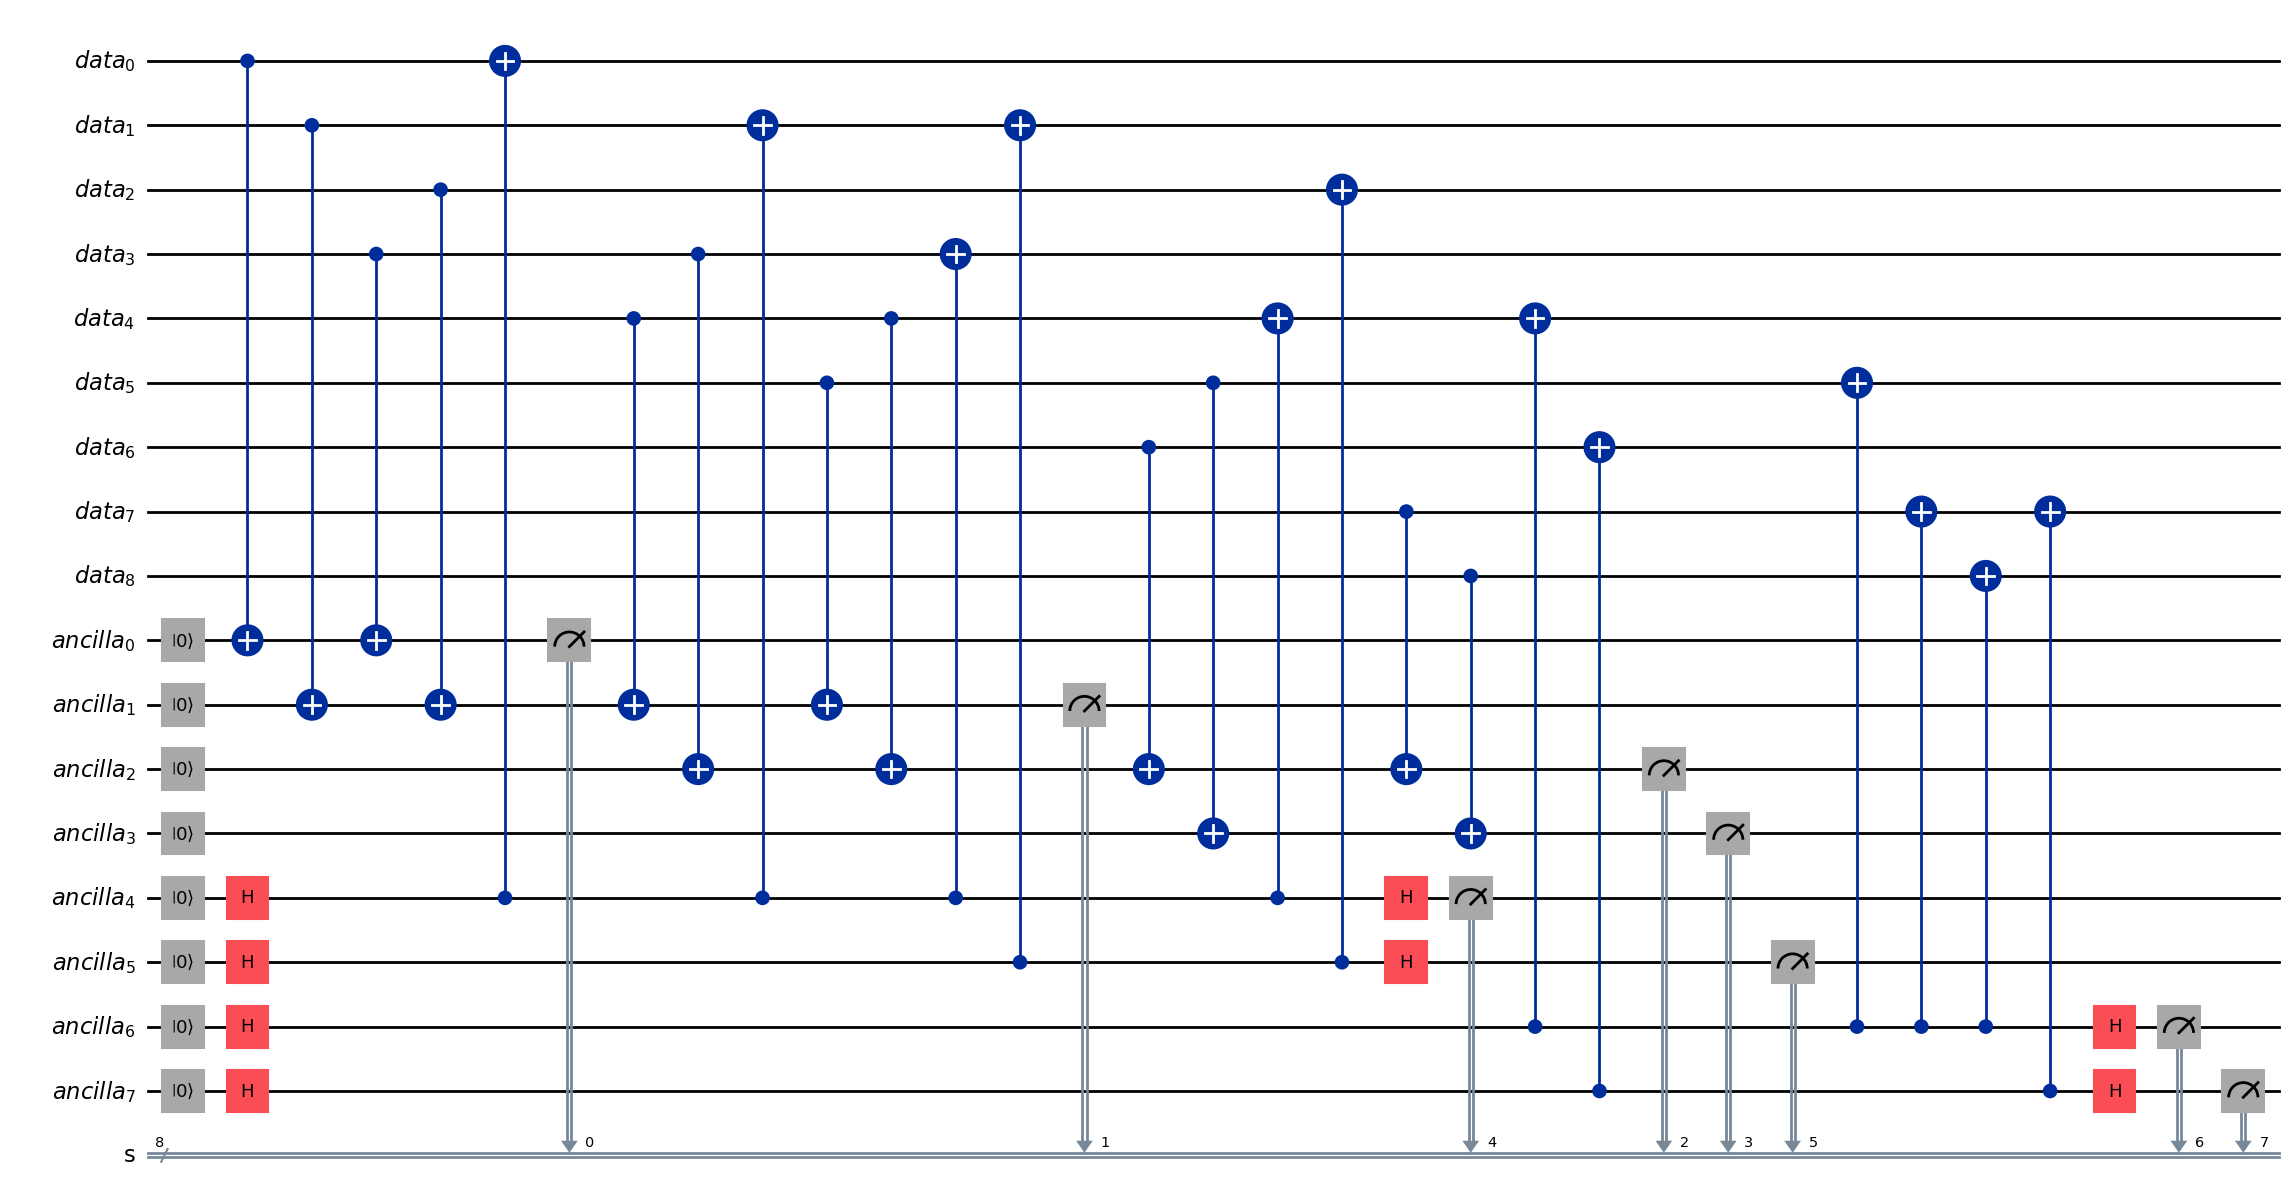

In [35]:
qc,data,anc,cr = init_surface_code()
measure_all_stabilizers(qc,data,anc,cr,z_stabilizers,x_stabilizers)
qc.draw("mpl",fold=1)